# Comparison between plugin and python results

In [20]:
from mmsplice.vcf_dataloader import SplicingVCFDataloader
from mmsplice import MMSplice, predict_all_table

from mmsplice.utils import max_varEff

## mmsplice perl plugin results

Run MMSplice and obtain `variant_effect_output.txt` file check VEP_plugin/README.md for more details. 

Parses `variant_effect_output.txt` file as dataframe

In [2]:
from mmsplice.utils import read_vep

df_plugin = read_vep('../variant_effect_output.txt')

In [3]:
df_plugin_predictionsMax = max_varEff(df_plugin).set_index('ID')

In [4]:
df_plugin.shape

(17513, 14)

In [5]:
df_plugin_predictionsMax.head()

,mmsplice_dlogitPsi,mmsplice_alt_acceptor,mmsplice_alt_acceptorIntron,mmsplice_alt_donor,mmsplice_alt_donorIntron,mmsplice_alt_exon,mmsplice_delta_logit_psi,mmsplice_pathogenicity,mmsplice_ref_acceptor,mmsplice_ref_acceptorIntron,mmsplice_ref_donor,mmsplice_ref_donorIntron,mmsplice_ref_exon
ID,,,,,,,,,,,,,
17:41197805:ACATCTGCC:['A'],0.048545,5.068929,-2.924059,-4.232478,-0.068444,-3.663338,0.048545,0.942513,5.068929,-2.924059,-4.232478,-0.068444,-3.694287
17:41197809:CTGCCCAAT:['C'],-0.208980,4.766502,-2.924059,-3.931190,0.482525,-4.180473,-0.208980,0.982340,5.068929,-2.924059,-3.931190,0.482525,-4.191132
17:41197810:T:['A'],0.098853,5.068929,-2.924059,-2.570118,-0.261311,-3.897650,0.098853,0.872820,5.068929,-2.924059,-2.570118,-0.261311,-3.961106
17:41197811:G:['T'],0.325282,5.068929,-2.924059,-2.570118,-0.261311,-3.751340,0.325282,0.877968,5.068929,-2.924059,-2.570118,-0.261311,-3.961106
17:41197812:C:['A'],0.050051,5.068929,-2.924059,-2.570118,-0.261311,-3.929184,0.050051,0.871686,5.068929,-2.924059,-2.570118,-0.261311,-3.961106


## mmsplice python api results

In [6]:
gtf = '../tests/data/test.gtf'
vcf = '../tests/data/test.vcf.gz'
fasta = '../tests/data/hg19.nochr.chr17.fa'
gtfIntervalTree = '../tests/data/test.pkl' # pickle exon interval Tree

In [7]:
dl = SplicingVCFDataloader(gtfIntervalTree, 
                          fasta,
                          vcf,
                          out_file=gtfIntervalTree,
                          split_seq=False, overhang=(100,100))

In [8]:
model = MMSplice(
    exon_cut_l=0,
    exon_cut_r=0,
    acceptor_intron_cut=6,
    donor_intron_cut=6,
    acceptor_intron_len=50,
    acceptor_exon_len=3,
    donor_exon_len=5,
    donor_intron_len=13)

/home/muhammedhasan/Projects/MMSplice/venv/lib/python3.5/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [9]:
df_python = predict_all_table(model, dl, batch_size=1024, split_seq=False, assembly=True, pathogenicity=True, splicing_efficiency=True)

0it [00:00, ?it/s]/home/muhammedhasan/Projects/MMSplice/mmsplice/mmsplice.py:162: UserWarning: None GT donor
  warnings.warn("None GT donor", UserWarning)
/home/muhammedhasan/Projects/MMSplice/mmsplice/mmsplice.py:164: UserWarning: None AG donor
  warnings.warn("None AG donor", UserWarning)
3it [00:20,  7.34s/it]


In [10]:
df_python.head()

,ID,exons,mmsplice_pathogenicity,mmsplice_dse,mmsplice_dlogitPsi
0,17:41197805:ACATCTGCC:['A'],17_41197695_41197819:-,0.871460,-0.024030,0.040370
1,17:41197805:ACATCTGCC:['A'],17_41196312_41197819:-,0.908687,-0.119514,0.001848
2,17:41197805:ACATCTGCC:['A'],17_41196313_41197819:-,0.949493,-0.119505,0.001852
3,17:41197805:ACATCTGCC:['A'],17_41196822_41197819:-,0.853564,-0.108007,0.006490
4,17:41197805:ACATCTGCC:['A'],17_41197580_41197819:-,0.941126,-0.012832,0.044888


In [11]:
df_python.shape

(2164, 5)

In [12]:
df_python_predictionsMax = max_varEff(df_python).set_index('ID')

## Comparison

In [13]:
indexes = list(set(df_plugin_predictionsMax.index) & set(df_python_predictionsMax.index))

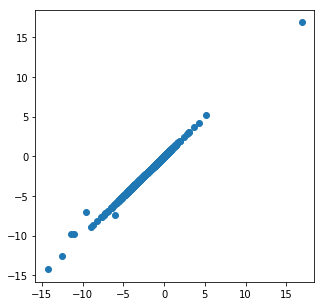

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.scatter(
    df_plugin_predictionsMax.loc[indexes, 'mmsplice_dlogitPsi'],
    df_python_predictionsMax.loc[indexes, 'mmsplice_dlogitPsi'])
plt.show()

In [15]:
from scipy.stats import pearsonr

pearsonr(df_plugin_predictionsMax.loc[indexes, 'mmsplice_dlogitPsi'], 
         df_python_predictionsMax.loc[indexes, 'mmsplice_dlogitPsi'])[0]

0.9985859147942231

In [16]:
sum(0 !=
    df_plugin_predictionsMax.loc[indexes, 'mmsplice_dlogitPsi'] - 
    df_python_predictionsMax.loc[indexes, 'mmsplice_dlogitPsi'])

4

In [17]:
diff_series = df_plugin_predictionsMax.loc[indexes, 'mmsplice_dlogitPsi'] - df_python_predictionsMax.loc[indexes, 'mmsplice_dlogitPsi']
diff_series = diff_series[diff_series != 0]

Following handled by plugin not python. This is fine due to extra exons.

In [18]:
len(set(df_plugin_predictionsMax.index) - set(df_python_predictionsMax.index))

12

In [19]:
list(set(df_python_predictionsMax.index) - set(df_plugin_predictionsMax.index))

[]